$\huge \text{Excercise 3:}$

$\text{Q1. Note that problem (1) can be written as} \\ \\ 
min_
w
f(w) = min_w
∑_{i=1}^n
f_i(w)
\\ \text{[R] Find an appropriate choice of } f_i(w)$

$\large \text{Answer:}\text{As we know the appropriate choice of f is :} \\ f_i(w)=\frac{λ}{2n}||w||_2^2+\frac{1}{n}∑_{i=1}^nL(y_i,w^Tx_i)  \\ \text{so now }: f(w) = ∑_{i=1}^nf_i(w)$

In [64]:
import numpy as np
#we will load the iris data from scikit-learn package
from sklearn.datasets import load_iris
iris = load_iris()
#check the shape of iris data
print(iris.data.shape)
A = iris.data
#Normalize columns of A so that all entries are in the range [-1,+1] 
for i in range(A.shape[1]):
    A[:,i] = -1+(((A[:,i]-min(A[:,i]))*2)/(max(A[:,i])-min(A[:,i])))
#check the shape of iris target
print(iris.target.shape)
#How many labels does iris data have?
num_of_classes = len(set(iris.target))
C=num_of_classes
print('Num of Classes: ',C)
n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points

(150, 4)
(150,)
Num of Classes:  3


In [65]:
#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],])
for i in range(iris.target.shape[0]):
  if iris.target[i]!=1:
    y[i] = -1 # Convert class labels that are not 1 into -1
  else:
    pass
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices
print(indexarr) #check indexarr after shuffling
#Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_data = A[indexarr[0:int(0.8*n)]]
train_label = y[indexarr[0:int(0.8*n)]]
test_data = A[indexarr[int(0.8*n):]]
test_label = y[indexarr[int(0.8*n):]]

[130 125   7  33 111 144 115  16  44  89  60  57 136 109  35  47  71   0
  69  27  56 137  31 135  74  39  20   4 103 143  19  54  29  58 139  48
  85 100 129  43  73 120  78  37 124  87  94 141 134  26  86 138  68  18
  72  28  79 105  10  41  81  11 127  34  92  95 128 101  99  77  53 106
   1  51  45  32  38  62 110 147  90 117  98  80 131  55   3 114  46  12
  97   9  64 148  59  15 140 121  40 119  50 122 118  93  52 104  23  96
   8 123 149  21  22  67 126 116 107  84 108  42  17  82   5 142 102  24
 145  14  30  65  83  75  61 132 113  88  76   2  91 146  66  36  25   6
  70  63 133 112  49  13]


In [66]:
def predict(w,x):
  return [np.sign((w.T)@(np.reshape(x[i], [d,1]))) for i in range(len(x))]

In [67]:
def compute_accuracy(data,labels,model_w):
  total=0
  correct=0
  for x,y in zip(labels,predict(model_w,data)):
    if(x==y):
      correct+=1
    total+=1
  return correct*100/total

In [68]:
A

array([[-5.55555556e-01,  2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -1.66666667e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-7.77777778e-01,  0.00000000e+00, -8.98305085e-01,
        -9.16666667e-01],
       [-8.33333333e-01, -8.33333333e-02, -8.30508475e-01,
        -9.16666667e-01],
       [-6.11111111e-01,  3.33333333e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-3.88888889e-01,  5.83333333e-01, -7.62711864e-01,
        -7.50000000e-01],
       [-8.33333333e-01,  1.66666667e-01, -8.64406780e-01,
        -8.33333333e-01],
       [-6.11111111e-01,  1.66666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-9.44444444e-01, -2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -8.33333333e-02, -8.30508475e-01,
        -1.00000000e+00],
       [-3.88888889e-01,  4.16666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-7.22222222e-01,  1.66666667e-01, -7.96610169e-01,
      

In [69]:
A.shape[1]

4

#Que-2.

$\large \text{Q2.Consider the loss function } L_h \text{. Write a python module to compute the loss function } L_h.$

$\text{Write a python routine to compute the objective function value. Use the compute loss function.
}$

In [70]:
def compute_loss_h(w,x,y):
  z = np.zeros(len(y))
  #print(w.shape)
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()

  #print(z)
  loss = [0 if z[i]>=1 else (1-z[i]) for i in range(len(z))]
  return np.array(loss)

def compute_objfnval(data,labels,model_w, lam):
  return np.mean(compute_loss_h(model_w,data,labels))+ (lam/2)*np.linalg.norm(model_w,2)**2

In [71]:
def compute_grad_loss_h(x,y,model_w,lamda):
  x = np.reshape(x,[d,1])
  model_w = np.reshape(model_w, [d,1])
  z = (y*np.matmul(model_w.T, x)).item()
  if z >=1:
    grad = (lamda/n)*model_w
  if z <1:
    grad = ((1/n)*(-y*x) + (lamda/n)*model_w)
  return grad

#Que-3.

In [72]:
def orthogonal_proj(z):
  ortho_proj = np.ones(len(z[0]))
  if np.sum(abs(z[i][0]) for i in range(len(z[0])))<=1 :
    ortho_proj = z
  else:
    for i in range(len(z[0])):
      ortho_proj[i] = ortho_proj[i]/np.sum(abs(z[i][0]) for i in range(len(z)))
  return ortho_proj

#Que-4.

In [73]:
def OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs): 
  t=1
  #initialize w
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(train_data.shape[0])
  obj = []
  train = []
  test = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- Proj_C(w - step * g_i (w))
      w = orthogonal_proj(w-step*compute_grad_loss_h(train_data[i],train_label[i],w,lamda))
      t = t+1
      if t>1e4:
        t=1 
    obj.append(compute_objfnval(train_data,train_label,w, lamda))
    train.append(compute_accuracy(train_data,train_label,w))
    test.append(compute_accuracy(test_data,test_label,w))
  return w,obj,train,test

In [74]:
w=np.random.normal(0,0.1,(d,1))
print(w)

[[-0.0816128 ]
 [-0.07607114]
 [ 0.01994259]
 [ 0.04326883]]


In [75]:
np.linalg.norm(5.3)

5.3

In [76]:
w[1][0]

-0.07607113801232956

In [77]:
np.ones(13)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [78]:
num_epochs = 1000
Lamda_values = [1e-3,1e-2,0.1,1,10]
Obj_Values = []
Test_Accs = []
Train_Accs = []
W_s = []
for lamda in Lamda_values:
  w,obj,train,test = OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs)
  W_s.append(w)
  Obj_Values.append(obj)
  Test_Accs.append(test)
  Train_Accs.append(train)

<ipython-input-72-a14aeb879dab>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if np.sum(abs(z[i][0]) for i in range(len(z[0])))<=1 :


######a.

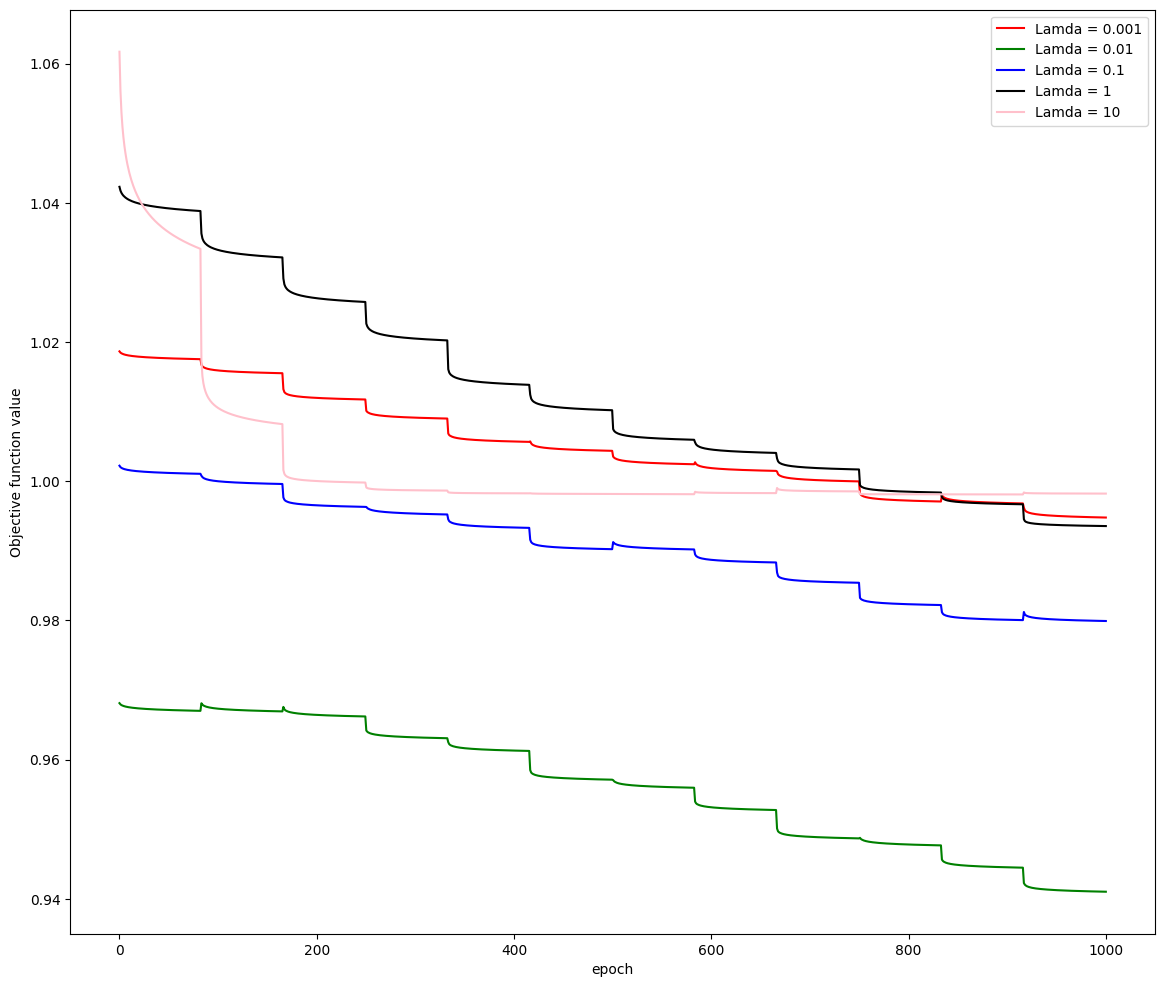

In [79]:
Colors = ['red','green','blue','black','pink']
import matplotlib.pyplot as plt
plt.figure(figsize = (14,12))
plt.ylabel('Objective function value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Obj_Values[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Obj_Values[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Obj_Values[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Obj_Values[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Obj_Values[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

######b.

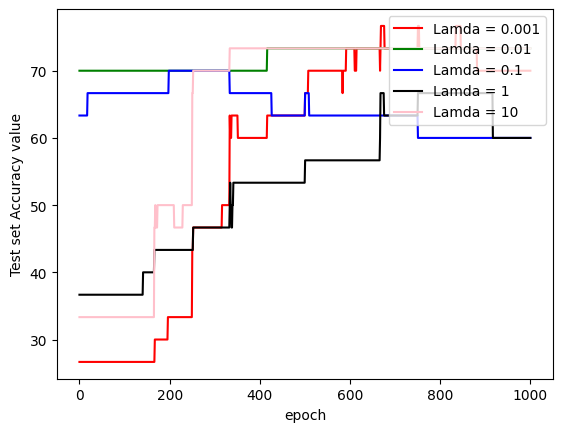

In [80]:
plt.legend(loc = 'upper right')
plt.ylabel('Test set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Test_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Test_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Test_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Test_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Test_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

####c

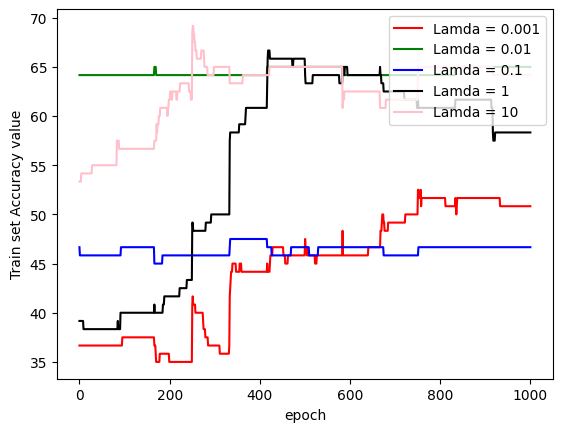

In [81]:
plt.legend(loc = 'upper right')
plt.ylabel('Train set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Train_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Train_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Train_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Train_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Train_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

####d.

In [82]:
from tabulate import tabulate
data = [[Lamda_values[i],Test_Accs[i][-1],Train_Accs[i][-1]] for i in range(len(Lamda_values))]
head = ['Lamda','Final Test Accuracy','Final Train Accuracy']
print(tabulate(data, headers=head, tablefmt="pretty"))

+-------+---------------------+----------------------+
| Lamda | Final Test Accuracy | Final Train Accuracy |
+-------+---------------------+----------------------+
| 0.001 |        70.0         |  50.833333333333336  |
| 0.01  |  73.33333333333333  |         65.0         |
|  0.1  |        60.0         |  46.666666666666664  |
|   1   |        60.0         |  58.333333333333336  |
|  10   |  73.33333333333333  |  64.16666666666667   |
+-------+---------------------+----------------------+


####e.

We get highest final test and train accuracy dfor lambda = 10. And we get reasonably good accuracies for lambda = 0.001 and 0.01 as well.


The minimum value of function is obtained more efficiently for lamda = 0.01 and 0.001 as clear from the plot.

#Que-5.

For logistic loss:

In [83]:
def compute_loss_l(w,x,y):
  z = np.zeros(len(y))
  #print(w.shape)
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()

  #print(z)
  loss = [np.log(1+np.exp(-z[i])) for i in range(len(z))]
  return np.array(loss)

In [84]:
def compute_objfnval2(data,labels,model_w, lam):
  return np.mean(compute_loss_l(model_w,data,labels))+ (lam/2)*np.linalg.norm(model_w,2)**2

In [85]:
def compute_grad_loss_l(x,y,model_w, lam):
  x = np.reshape(x, [d,1])
  model_w = np.reshape(model_w, [d,1])
  z = (y*np.matmul(model_w.T, x)).item()
  #print(z)
  grad = -((1/n)* y*x* np.exp(-z))/(1+np.exp(-z)) + (lam/n)*model_w
  return grad

In [86]:
def OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs): 
  t=1
  #initialize w
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(train_data.shape[0])
  obj = []
  train = []
  test = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- Proj_C(w - step * g_i (w))
      w = orthogonal_proj(w-step*compute_grad_loss_l(train_data[i],train_label[i],w,lamda))
      t = t+1
      if t>1e4:
        t=1 
    obj.append(compute_objfnval2(train_data,train_label,w, lamda))
    train.append(compute_accuracy(train_data,train_label,w))
    test.append(compute_accuracy(test_data,test_label,w))
  return w,obj,train,test

In [87]:
num_epochs = 1000
Lamda_values = [1e-3,1e-2,0.1,1,10]
Obj_Values = []
Test_Accs = []
Train_Accs = []
W_s = []
for lamda in Lamda_values:
  w,obj,train,test = OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs)
  W_s.append(w)
  Obj_Values.append(obj)
  Test_Accs.append(test)
  Train_Accs.append(train)

<ipython-input-72-a14aeb879dab>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if np.sum(abs(z[i][0]) for i in range(len(z[0])))<=1 :


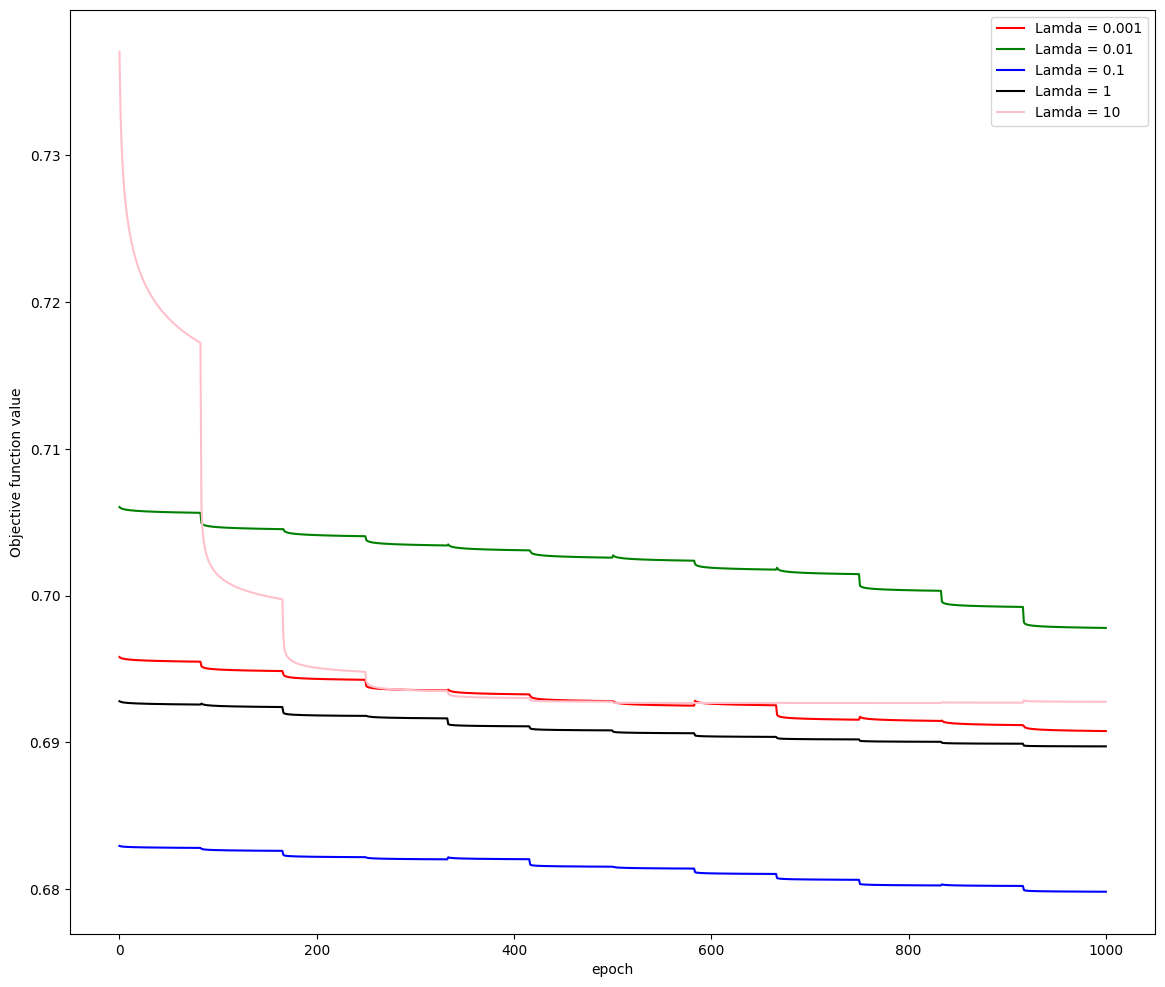

In [88]:
Colors = ['red','green','blue','black','pink']
import matplotlib.pyplot as plt
plt.figure(figsize = (14,12))
plt.ylabel('Objective function value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Obj_Values[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Obj_Values[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Obj_Values[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Obj_Values[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Obj_Values[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

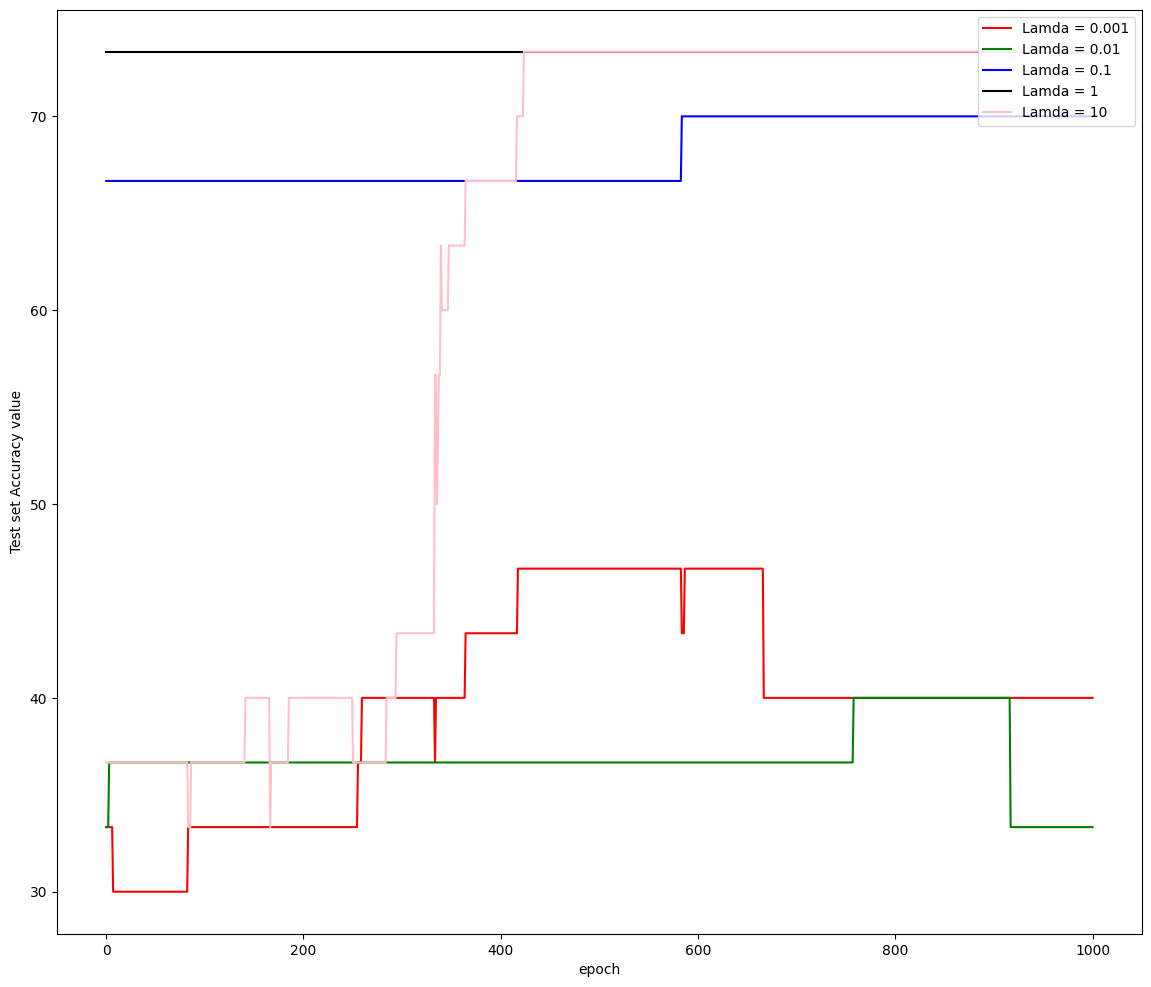

In [89]:
plt.figure(figsize = (14,12))
plt.ylabel('Test set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Test_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Test_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Test_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Test_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Test_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()




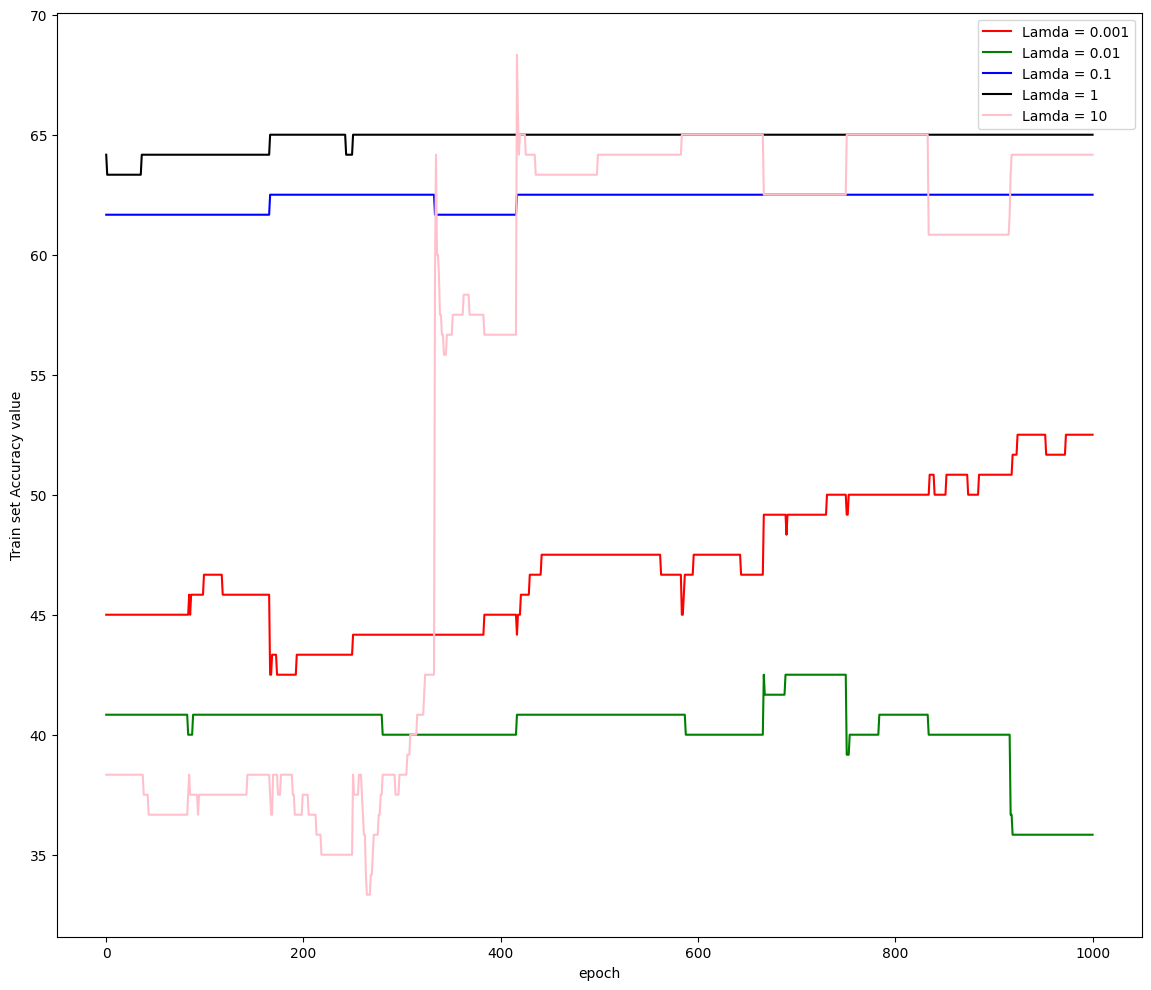

In [90]:
plt.figure(figsize = (14,12))
plt.ylabel('Train set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Train_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Train_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Train_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Train_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Train_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

In [91]:
from tabulate import tabulate
data = [[Lamda_values[i],Test_Accs[i][-1],Train_Accs[i][-1]] for i in range(len(Lamda_values))]
head = ['Lamda','Final Test Accuracy','Final Train Accuracy']
print(tabulate(data, headers=head, tablefmt="pretty"))

+-------+---------------------+----------------------+
| Lamda | Final Test Accuracy | Final Train Accuracy |
+-------+---------------------+----------------------+
| 0.001 |        40.0         |         52.5         |
| 0.01  | 33.333333333333336  |  35.833333333333336  |
|  0.1  |        70.0         |         62.5         |
|   1   |  73.33333333333333  |         65.0         |
|  10   |  73.33333333333333  |  64.16666666666667   |
+-------+---------------------+----------------------+


Almost same observations are observed here also. However, we get minimum value of function with lamda = 0.01 in 1000 epochs. The test and train accuracies increase here with the increament in number of epochs.

For Squared Hinge loss:

In [92]:
def compute_loss_sh(w,x,y):
  z = np.zeros(len(y))
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()

  return np.array([0 if z[i]>=1 else (1-z[i])**2 for i in range(len(z))])

In [93]:
def compute_objfnval3(data,labels,model_w, lam):
  return np.mean(compute_loss_sh(model_w,data,labels))+ (lam/2)*np.linalg.norm(model_w,2)**2

In [94]:
def compute_grad_loss_sh(x,y,model_w, lam):
 x = np.reshape(x, [d,1])
 model_w = np.reshape(model_w, [d,1])
 z = (y*np.matmul(model_w.T, x)).item()
 if z >=1:
   grad = (lam/n)*model_w
 if z <1:
   grad = ((2/n)*(-y* x)*(1-z) + (lam/n)*model_w)
 return grad

In [95]:
def OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs): 
  t=1
  #initialize w
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(train_data.shape[0])
  obj = []
  train = []
  test = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- Proj_C(w - step * g_i (w))
      w = orthogonal_proj(w-step*compute_grad_loss_sh(train_data[i],train_label[i],w,lamda))
      t = t+1
      if t>1e4:
        t=1 
    obj.append(compute_objfnval3(train_data,train_label,w, lamda))
    train.append(compute_accuracy(train_data,train_label,w))
    test.append(compute_accuracy(test_data,test_label,w))
  return w,obj,train,test

In [96]:
num_epochs = 1000
Lamda_values = [1e-3,1e-2,0.1,1,10]
Obj_Values = []
Test_Accs = []
Train_Accs = []
W_s = []
for lamda in Lamda_values:
  w,obj,train,test = OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs)
  W_s.append(w)
  Obj_Values.append(obj)
  Test_Accs.append(test)
  Train_Accs.append(train)

<ipython-input-72-a14aeb879dab>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if np.sum(abs(z[i][0]) for i in range(len(z[0])))<=1 :


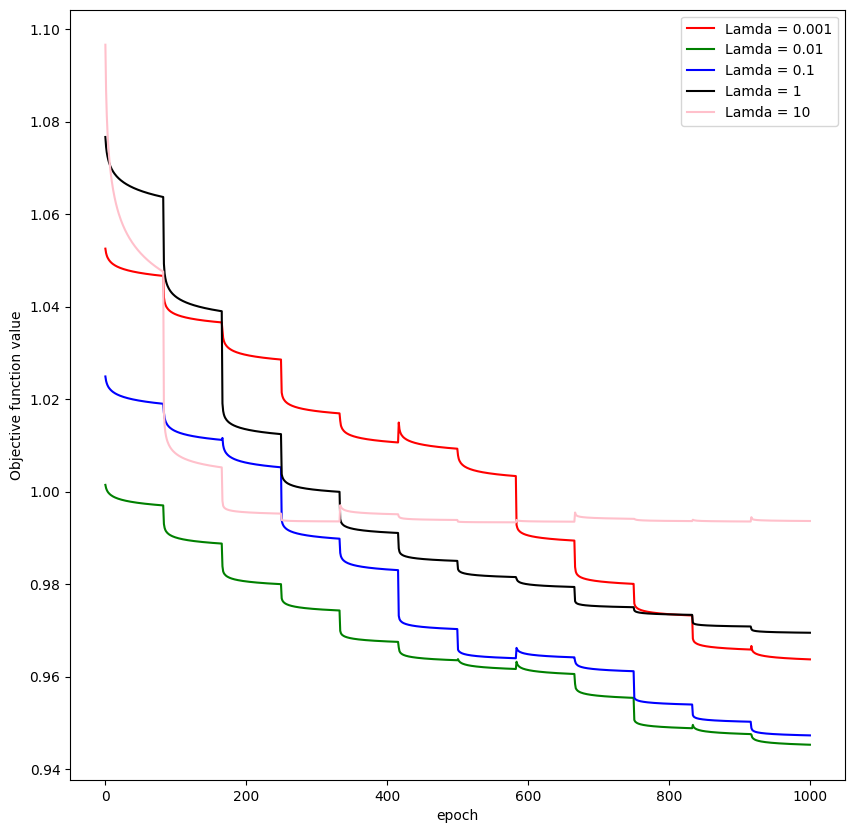

In [97]:
Colors = ['red','green','blue','black','pink']
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.ylabel('Objective function value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Obj_Values[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Obj_Values[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Obj_Values[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Obj_Values[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Obj_Values[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()






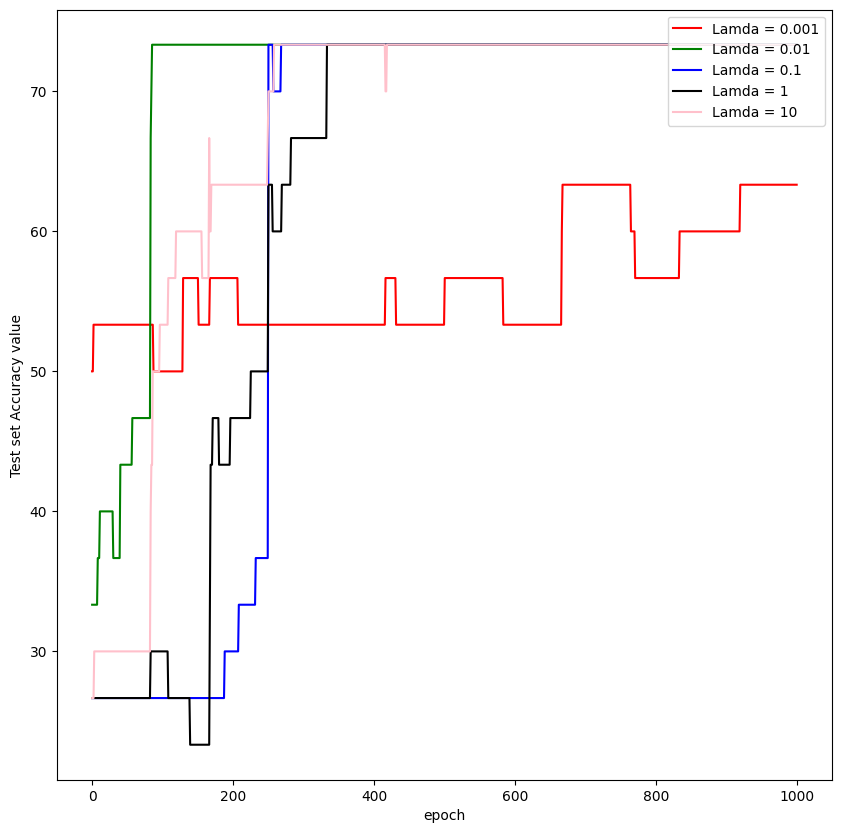

In [98]:
plt.figure(figsize = (10,10))
plt.ylabel('Test set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Test_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Test_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Test_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Test_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Test_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

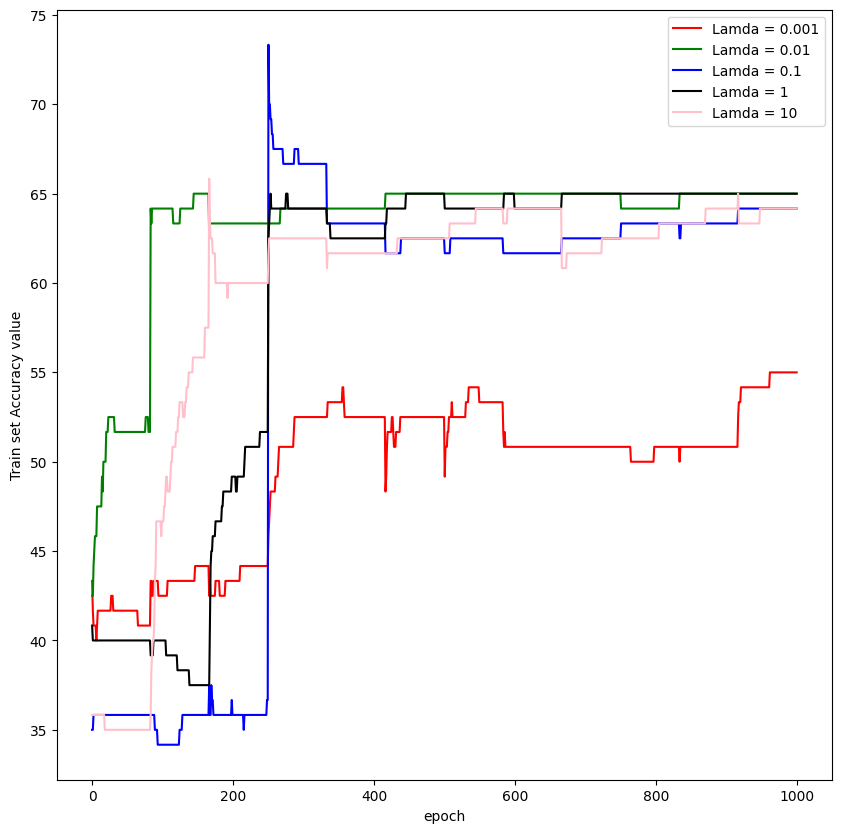

In [99]:
plt.figure(figsize = (10,10))
plt.ylabel('Train set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Train_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Train_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Train_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Train_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Train_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

In [100]:
from tabulate import tabulate
data = [[Lamda_values[i],Test_Accs[i][-1],Train_Accs[i][-1]] for i in range(len(Lamda_values))]
head = ['Lamda','Final Test Accuracy','Final Train Accuracy']
print(tabulate(data, headers=head, tablefmt="pretty"))

+-------+---------------------+----------------------+
| Lamda | Final Test Accuracy | Final Train Accuracy |
+-------+---------------------+----------------------+
| 0.001 | 63.333333333333336  |         55.0         |
| 0.01  |  73.33333333333333  |         65.0         |
|  0.1  |  73.33333333333333  |  64.16666666666667   |
|   1   |  73.33333333333333  |         65.0         |
|  10   |  73.33333333333333  |  64.16666666666667   |
+-------+---------------------+----------------------+


Here we get quite low accuracy for each value of lambda. This means it is not a good loss function to be used here for this fuction.